<img width=200px align="top" src="https://www.fct.unl.pt/sites/default/files/images/nova_4.png" title="Source: [Online] https://www.fct.unl.pt/sites/default/files/images/nova_4.png">

## **SI 2024/25 - Intelligent Supervision System for Fault Detection**

This notebook provides a step-by-step guide to implementing an intelligent supervision system using Fuzzy Control, Bayesian Networks, and Machine Learning for Labwork 2.

<img width=400px align="right" src="lab2SI.jpeg">

# Objective
Implement a basic supervision system for a machine using Python, focusing on uncertain reasoning techniques (fuzzy control, Bayesian networks) and machine learning. The goal is to detect faults based on sensor data.

# Scenario
Students will create a simple monitoring system to **detect potential faults** in an industrial machine based on simulated sensor data (e.g., temperature, vibration, and pressure). For that it is planned the usage of fuzzy logic for real-time diagnostics, Bayesian inference for probabilistic fault prediction, and machine learning to classify fault vs. normal operation.

# Required Setup/Libraries
- If you don't have a Python environment already configured in your machine it is recommendedthat you download and install Python via the
Anaconda distribution
- Recommended IDE: VSCode. Alternatively Jupyter Notebook can also be used (comes with theAnaconda distribution) or anyother IDE supporting the notebook
- Python Libraries: Pandas and Numpy (data structures and manipulation), scipy, scikit-fuzzy, pgmpy (for Bayesian networks), and scikit-learn (Machine Learning), etc.

# Guidelines
For the mentioned implementation of a basic intelligent supervision system to monitor an industrial machine, focusing on fault detection, use Python to explore fuzzy logic, Bayesian networks, and machine learning to create a cohesive system for analyzing simulated sensor data. in this sense the purpose is:
- fuzzy logic for real-time diagnostics, 
- Bayesian inference for probabilistic fault prediction, and 
- machine learning to classify fault vs. normal operation

The development is based on several predefied tasks for each specific part. 

- Task 1: Create a fuzzy control system that generates a fault score based on three sensor data
  - Define fuzzy variables for each sensor of Temperature, Vibration and Pressure (e.g., "low", "medium", "high").
  - Define membership functions for each sensor
  - Implement fuzzy rules
  - Define a fuzzy inference system to evaluate these rules and compute a fault score with a numeric value indicating the severity of the detected fault.
  
 - Task 2: Bayesian Inference for Fault Prediction
  - Build a simple Bayesian Network to calculate the probability of a fault based on sensor readings from Temperature, Vibration and Pressure
  - Define conditional probabilities based on a provided dataset (or predefined values)
  - Run inference to predict fault probability based on observed sensor values

- Task 3: Machine Learning for Fault Classification
  - Train a machine learning model to classify normal vs. faulty machine states
  - Load a labeled dataset with "normal" and "faulty" labels based on sensor readings
  - Use scikit-learn to train a classifier (e.g., Decision Tree) on this data
  - Use the trained model to classify real-time sensor readings as "normal" or "faulty"
  - A brief summary of findings: Which technique worked best and why?

- Task 4: Integrate Outputs and Provide Maintenance Recommendations

- Task 5: Labwork Reflexion
  - Write a short reflection (1-2 pages) discussing the strengths and weaknesses of each approach (fuzzy control, Bayesian networks, machine learning) in diagnosing and predicting faults. Discuss how combining these methods improves the reliability of the supervision system (this task sould be done in parallel with the others)

# Submission
* Completed projects should be submitted via the course's **Moodle** page before the end of the deadline.
* Projects should be executed in groups of 2 or 3 (maximum) students. Individual projects are allowed, but not encouraged.
* The project should be submitted as a **single .zip/rar** archive named following the template **"*studentNumber1_studentNumber2_studentNumber3.rar*"** (e.g. *31444_31445_31446.rar*)
* Deadline is **30 November 2024 23:59 GMT,  can be accpetable until 07 December 2024 23:59 GMT**.

# Evaluation Criteria
All of the goal/value pairs listed below are based on the assumption that a correct implementation is submitted. 

Feel free to fill in the *Completed* column in accordance to your submission for the discussion (replace "*-*" with "*X*" when suitable).

| Goal                             | Value | Completed  |
|:---------------------------------|:------|:----------:| 
|   Task 1                         | 3     |     -      |
|   Task 2                         | 5     |     -      |
|   Task 3                         | 7     |     -      |
|   Task 4                         | 2     |     -      |
|   Task 5                         | 3     |     -      |
|   Submission without results     | -20   |     -      |


# LabWork Planning 
-  Lab 2.1 - Task 1 and Task 2 (+ Task 5)
-  Lab 2.2 - Task 3 and Task 4 (+ Task 5)
- (Lab 2.3 - Necessary refinments and doubts)


____________________________________

# Task 0: Setup Environment 
- Anaconda
- VS Code
- Libraries

____________________________________

# Task 1: Implementing Fuzzy Control
Objective: Create a fuzzy control system that generates a fault score based on three sensor data

Instructions:
- Define fuzzy variables for each sensor
    - Temperature: "Low," "Medium," "High"
    - Vibration: "Low," "Medium," "High"
    - Pressure: "Low," "Normal," "High"

- Use skfuzzy (from scikit-fuzzy) to define membership functions for each sensor

- Implement fuzzy rules. Example: IF temperature is high AND vibration is high THEN fault_risk is high

- Define a fuzzy inference system to evaluate these rules and compute a fault score

- functionalities for visualization of membership functions may also be developed

Expected Output: A numeric fault score indicating the severity of the detected fault.

c:\Users\raulm\.conda\envs\SI2425\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


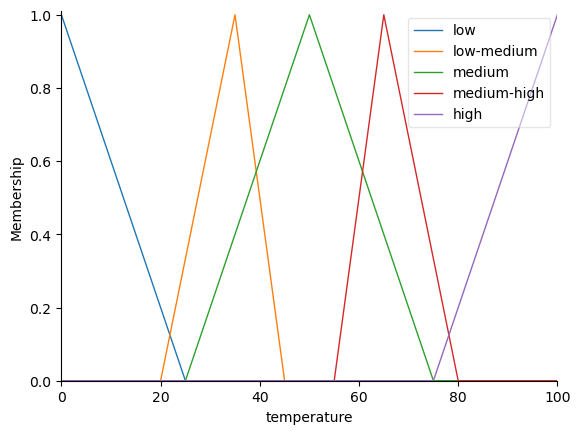

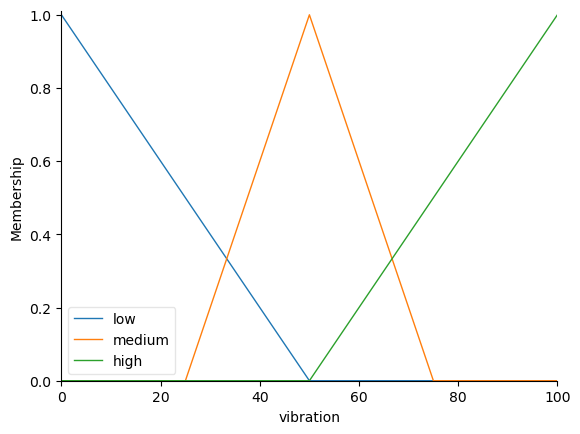

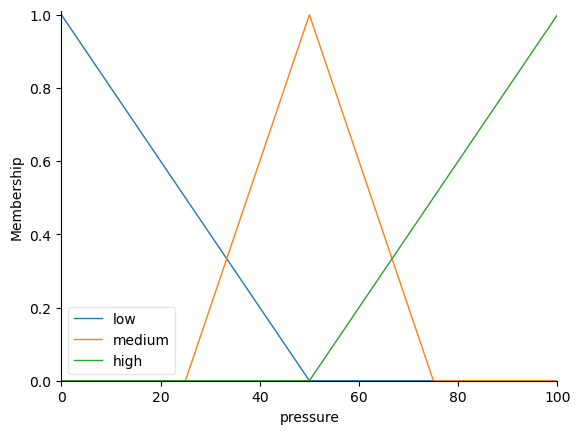

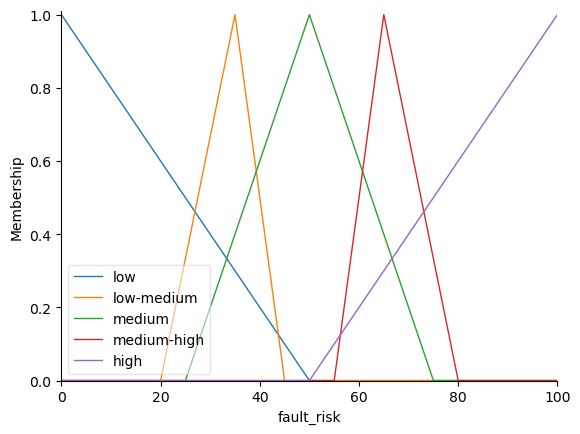

Fuzzy Fault Risk Level: 77.4074074074074


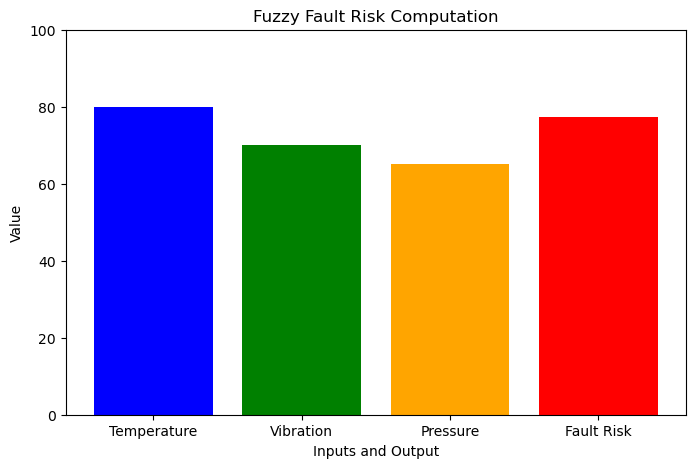

In [27]:
# Import required libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
vibration = ctrl.Antecedent(np.arange(0, 101, 1), 'vibration')
pressure = ctrl.Antecedent(np.arange(0, 101, 1), 'pressure')
fault_risk = ctrl.Consequent(np.arange(0, 101, 1), 'fault_risk')

# Define membership functions for fuzzy variables
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 25])
temperature['low-medium'] = fuzz.trimf(temperature.universe, [20, 35, 45])
temperature['medium'] = fuzz.trimf(temperature.universe, [25, 50, 75])
temperature['medium-high'] = fuzz.trimf(temperature.universe, [55, 65, 80])
temperature['high'] = fuzz.trimf(temperature.universe, [75, 100, 100])

vibration['low'] = fuzz.trimf(vibration.universe, [0, 0, 50])
vibration['medium'] = fuzz.trimf(vibration.universe, [25, 50, 75])
vibration['high'] = fuzz.trimf(vibration.universe, [50, 100, 100])

pressure['low'] = fuzz.trimf(pressure.universe, [0, 0, 50])
pressure['medium'] = fuzz.trimf(pressure.universe, [25, 50, 75])
pressure['high'] = fuzz.trimf(pressure.universe, [50, 100, 100])

fault_risk['low'] = fuzz.trimf(fault_risk.universe, [0, 0, 50])
fault_risk['low-medium'] = fuzz.trimf(temperature.universe, [20, 35, 45])
fault_risk['medium'] = fuzz.trimf(fault_risk.universe, [25, 50, 75])
fault_risk['medium-high'] = fuzz.trimf(temperature.universe, [55, 65, 80])
fault_risk['high'] = fuzz.trimf(fault_risk.universe, [50, 100, 100])

#
# ***** Can fuzzy variables be represented with more regions? How?
#

# Visualize membership functions
temperature.view()
vibration.view()
pressure.view()
fault_risk.view()

plt.show()

# Visualize the fuzzy result for Fault Risk
#fault_risk.view(sim=fault_simulation)

#plt.title("Fuzzy Output for Fault Risk")
#plt.xlabel("Fault Risk")
#plt.ylabel("Membership Degree")
#plt.show()

# Define rules for fault risk
rule1 = ctrl.Rule(temperature['high'] & vibration['high'] & pressure['high'], fault_risk['high'])
rule2 = ctrl.Rule(temperature['high'] & vibration['medium'] & pressure['medium'], fault_risk['high'])
rule3 = ctrl.Rule(temperature['medium'] & vibration['high'] & pressure['medium'], fault_risk['medium-high'])
rule4 = ctrl.Rule(temperature['medium'] & vibration['medium'] & pressure['high'], fault_risk['high'])

rule5 = ctrl.Rule(temperature['medium'] & vibration['medium'] & pressure['medium'], fault_risk['medium-high'])
rule6 = ctrl.Rule(temperature['medium'] & vibration['low'] & pressure['low'], fault_risk['medium'])
rule7 = ctrl.Rule(temperature['low'] & vibration['medium'] & pressure['low'], fault_risk['low-medium'])
rule8 = ctrl.Rule(temperature['low'] & vibration['low'] & pressure['medium'], fault_risk['medium'])

rule9 = ctrl.Rule(temperature['low'] & vibration['low'] & pressure['low'], fault_risk['low'])

#
# ***** Try to include more rules... 
#

# Create the fuzzy control system
fault_control = ctrl.ControlSystem([rule1, rule2, rule3])
fault_simulation = ctrl.ControlSystemSimulation(fault_control)

#
# ***** Example input values - test with others
#
fault_simulation.input['temperature'] = 80
fault_simulation.input['vibration'] = 70
fault_simulation.input['pressure'] = 65

# Compute fault risk
fault_simulation.compute()
print('Fuzzy Fault Risk Level:', fault_simulation.output['fault_risk'])

# Visualization of Fault Risk
# Inputs and computed risk
inputs = ['Temperature', 'Vibration', 'Pressure', 'Fault Risk']
values = [80, 70, 65, fault_simulation.output['fault_risk']]
# Bar chart for visualization
plt.figure(figsize=(8, 5))
plt.bar(inputs, values, color=['blue', 'green', 'orange', 'red'])
plt.title("Fuzzy Fault Risk Computation")
plt.ylabel("Value")
plt.xlabel("Inputs and Output")
plt.ylim(0, 100)  # Ensures consistent scale
plt.show()

____________________________________

# Task 2: Bayesian Inference for Fault Prediction
Objective: Build a Bayesian Network to calculate the probability of a fault based on sensor readings

Instructions:
- Use pgmpy to create a simple Bayesian Network with nodes for each sensor and a "Fault" node

- Define conditional probabilities based on a provided dataset (or predefined values)

- Run inference to predict fault probability based on observed sensor values

Expected Output: Probability of a fault, given current sensor readings

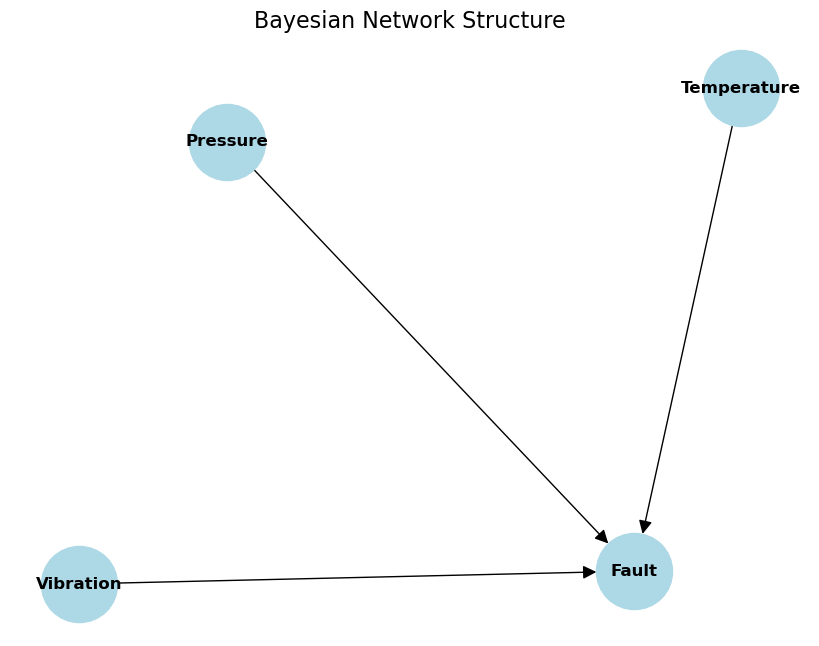

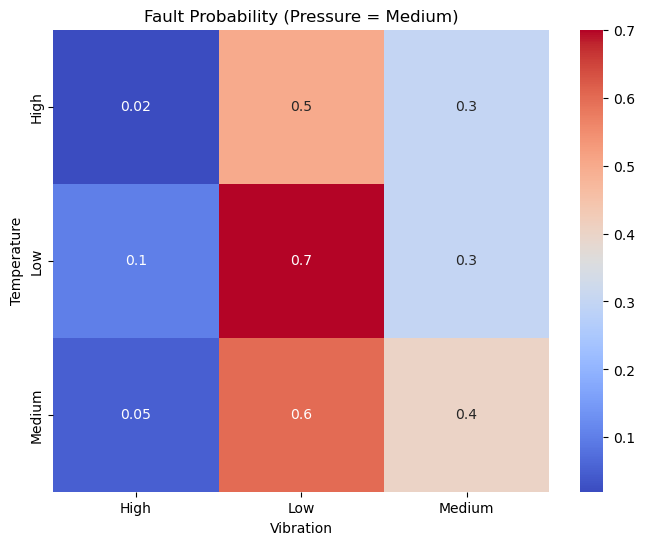

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


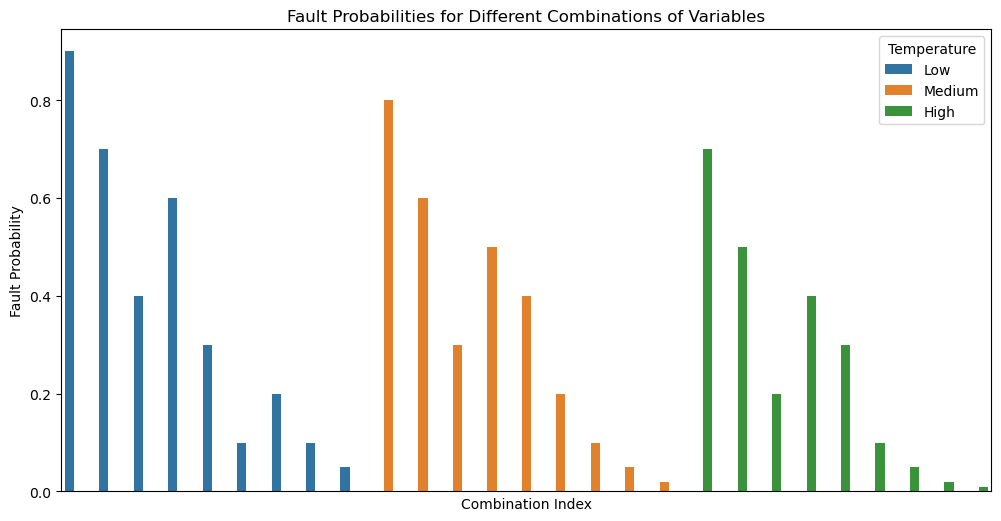

Bayesian Fault Probability: 0.99


In [36]:
# Import Bayesian network libraries
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define Bayesian network structure
model = BayesianNetwork([('Temperature', 'Fault'), ('Vibration', 'Fault'), ('Pressure', 'Fault')])

# Convert the Bayesian Network structure to a graph
graph = nx.DiGraph()
graph.add_edges_from(model.edges())

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold', arrowsize=20)
plt.title("Bayesian Network Structure", fontsize=16)
plt.show()

# Define CONDITIONAL PROBABILITY DISTRIBUTION - CPDs (hypothetical values)
cpd_temperature = TabularCPD(variable='Temperature', variable_card=3, values=[[0.3], [0.4], [0.3]])
cpd_vibration = TabularCPD(variable='Vibration', variable_card=3, values=[[0.4], [0.3], [0.3]])
cpd_pressure = TabularCPD(variable='Pressure', variable_card=3, values=[[0.5], [0.3], [0.2]])
cpd_fault = TabularCPD(
    variable='Fault',
    variable_card=2,
    values=[
        [0.9, 0.7, 0.4, 0.6, 0.3, 0.1, 0.2, 0.1, 0.05,
         0.8, 0.6, 0.3, 0.5, 0.4, 0.2, 0.1, 0.05, 0.02,
         0.7, 0.5, 0.2, 0.4, 0.3, 0.1, 0.05, 0.02, 0.01],
        [0.1, 0.3, 0.6, 0.4, 0.7, 0.9, 0.8, 0.9, 0.95,
         0.2, 0.4, 0.7, 0.5, 0.6, 0.8, 0.9, 0.95, 0.98,
         0.3, 0.5, 0.8, 0.6, 0.7, 0.9, 0.95, 0.98, 0.99],
    ],
    evidence=['Temperature', 'Vibration', 'Pressure'],
    evidence_card=[3, 3, 3]
)

# A heatmap can be shown with the probabilities of the Fault variable for different combinations of Temperature, Vibration, and Pressure
#Displays probabilities for a fixed value of Pressure (e.g., Medium), varying Temperature and Vibration.

# Create data for visualization
temperature_states = ['Low', 'Medium', 'High']
vibration_states = ['Low', 'Medium', 'High']
pressure_states = ['Low', 'Medium', 'High']
# Expanded CPD for 'Fault' with 27 combinations
fault_probabilities = [
    0.9, 0.7, 0.4, 0.6, 0.3, 0.1, 0.2, 0.1, 0.05,
    0.8, 0.6, 0.3, 0.5, 0.4, 0.2, 0.1, 0.05, 0.02,
    0.7, 0.5, 0.2, 0.4, 0.3, 0.1, 0.05, 0.02, 0.01
]
# Convert to DataFrame for easier manipulation
data = []
for i, temp in enumerate(temperature_states):
    for j, vib in enumerate(vibration_states):
        for k, pres in enumerate(pressure_states):
            index = i * 9 + j * 3 + k
            data.append([temp, vib, pres, fault_probabilities[index]])

df = pd.DataFrame(data, columns=['Temperature', 'Vibration', 'Pressure', 'Fault_Probability'])

# Pivot for heatmap (e.g., Temperature vs Vibration for a fixed Pressure)
pressure_filter = 'Medium'
df_filtered = df[df['Pressure'] == pressure_filter]
# Create a pivot table for heatmap
heatmap_data = df_filtered.pivot(index="Temperature", columns="Vibration", values="Fault_Probability")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True)
plt.title(f"Fault Probability (Pressure = {pressure_filter})")
plt.show()

# A bar plot can display probabilities for different combinations of Temperature, Vibration, and Pressure.
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x=np.arange(len(df)),  # Create an index for all combinations
    y="Fault_Probability",
    hue="Temperature",
    dodge=True
)

plt.title("Fault Probabilities for Different Combinations of Variables")
plt.xlabel("Combination Index")
plt.ylabel("Fault Probability")
plt.legend(title="Temperature")
plt.xticks([], [])  # Remove x-tick labels for simplicity
plt.show()


# Add CPDs to the model
model.add_cpds(cpd_temperature, cpd_vibration, cpd_pressure, cpd_fault)

# Verify the model
assert model.check_model()

# Perform inference
infer = VariableElimination(model)
result = infer.query(variables=['Fault'], evidence={'Temperature': 2, 'Vibration': 2, 'Pressure': 2})
print('Bayesian Fault Probability:', result.values[1])

#
# ***** Illustrate how the results can be changed and interpret them 
#

# Task 3: Machine Learning for Fault Classification
Objective: Train a machine learning model to classify normal vs. faulty machine states.

Instructions:

- Load a labeled dataset (or a synthetic dataset) with "normal" and "faulty" labels based on sensor readings

- Use scikit-learn to train a classifier (e.g., Decision Tree) on this data

- Use the trained model to classify real-time sensor readings as "normal" or "faulty."

Expected Output: Classifier that predicts "normal" or "faulty" machine status.

   Temperature  Vibration  Pressure    Label
0           97         67        62  caution
1           68         80        87  caution
2           58         57        41  caution
3           59         12        45  caution
4            2         24        12   normal
--- Decision Tree ---
Accuracy: 0.97
              precision    recall  f1-score   support

     caution       0.97      0.99      0.98        78
      faulty       1.00      0.33      0.50         3
      normal       0.95      1.00      0.97        19

    accuracy                           0.97       100
   macro avg       0.97      0.77      0.82       100
weighted avg       0.97      0.97      0.97       100


--- Random Forest ---
Accuracy: 0.96
              precision    recall  f1-score   support

     caution       0.96      0.99      0.97        78
      faulty       1.00      0.33      0.50         3
      normal       0.95      0.95      0.95        19

    accuracy                           0.96       100
  

c:\Users\raulm\.conda\envs\SI2425\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raulm\.conda\envs\SI2425\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raulm\.conda\envs\SI2425\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


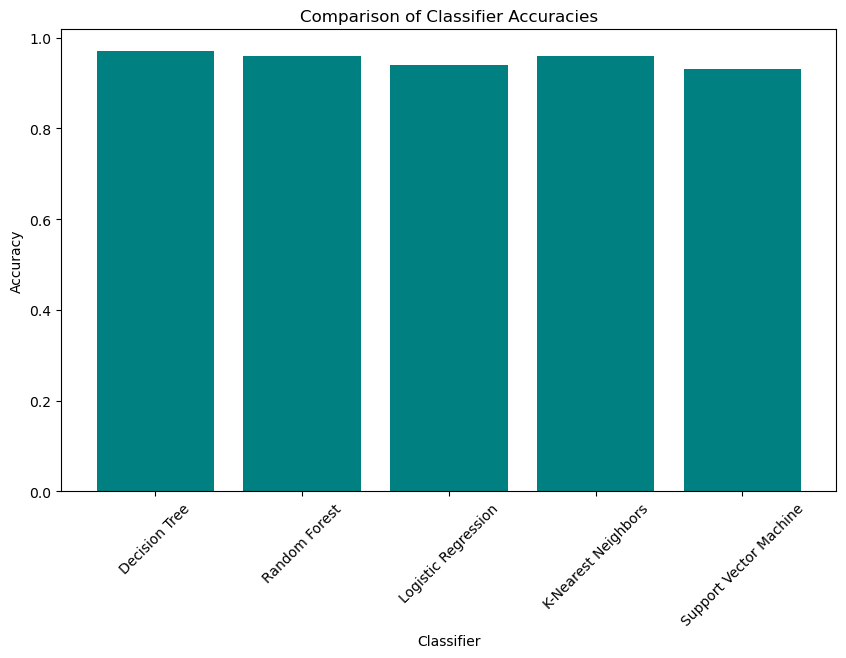

In [42]:
# Import libraries for machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.tree import plot_tree
#from sklearn.metrics import ConfusionMatrixDisplay

# Synthetic data
sensor_data = np.array([[30, 20, 50], [60, 40, 60], [90, 70, 75], [25, 15, 48], [80, 65, 80]])
labels = np.array(['normal', 'caution', 'faulty', 'normal', 'faulty'])

#
# ***** read new data from the provided csv or create a new one 
#
data = pd.read_csv("D:\synthetic_sensor_data.csv")
# Separate features and labels
#sensor_data = data['Temperature'].tolist()
sensor_data = data[['Temperature', 'Vibration', 'Pressure']].values
labels = data['Label'].tolist()

# Display the first few rows of the data
print(data.head())


# Map string labels to integers
label_mapping = {'normal': 0, 'caution': 1, 'faulty': 2}
labels_numeric = np.array([label_mapping[label] for label in labels])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sensor_data, labels, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True)  # Enable probabilities for SVM
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = clf.predict(X_test)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print classification report
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print()

# Summarize results
print("Summary of Accuracies:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.2f}")

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='teal')
plt.title("Comparison of Classifier Accuracies")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

#
# *** clearly identify the used classifiers and comment results
#

# Task 4: Integrate Outputs and Provide Maintenance Recommendations
Objective: Combine outputs from fuzzy control, Bayesian network, and machine learning models to generate a fault assessment and maintenance recommendation

Instructions:
- Use the fuzzy fault score, Bayesian fault probability, and ML classifier output to assess the machine's state

- Develop simple logic for recommendations:
    - High fault score and high fault probability -> Immediate maintenance
    - Moderate scores -> Monitoring
    - Low scores -> Normal operation
    
Expected Output: Maintenance recommendation based on combined analysis

In [44]:
# Define recommendation logic
def maintenance_recommendation(fuzzy_score, bayesian_prob, ml_prediction):
    if fuzzy_score > 70 and bayesian_prob > 0.7 and ml_prediction == 'faulty':
        return 'Immediate maintenance required'
    elif fuzzy_score > 50 or bayesian_prob > 0.5:
        return 'Monitor closely'
    else:
        return 'Normal operation'

# Example integration
recommendation = maintenance_recommendation(75.0, 0.8, 'faulty')
print('Maintenance Recommendation:', recommendation)

# Example integration
recommendation = maintenance_recommendation(55.0, 0.3, 'faulty')
print('Maintenance Recommendation:', recommendation)

#
# ***** Provide other examples and comment them
#

Maintenance Recommendation: Immediate maintenance required
Maintenance Recommendation: Monitor closely


# Task 5: Labwork Reflexion
Write a short reflection (1-2 pages) discussing the strengths and weaknesses of each approach (fuzzy control, Bayesian networks, machine learning) in diagnosing and predicting faults. Discuss how combining these methods improves the reliability of the supervision system.